## Experimentación - Predicción
- Se intentará predecir el valor de la variable 'covid_19_confirmado', la cual contiene 2 valores (0 -> Covid19 - negativo, 1 --> Covid19 - Positivo)

- La variable surge a partir de la variable clasificacion_resumen (del dataset Casos COVID-19 provisto por el Ministerio de Salud de Argentina) luego de realizar el proceso de limpieza y pre-procesado disponible en el Notebook Limpieza_Preprocesado_Covid19Casos.ipynb

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Levantamos el Dataset
- Previo a realizar este paso es necesario ejecutar el Notebook: Limpieza_Preprocesado_Covid19Casos.ipynb

In [3]:
PATH = "./data/"
FILE_NAME = 'covid19_limpio.csv'
FULL_NAME = PATH + FILE_NAME

In [4]:
df = pd.read_csv(FULL_NAME)

In [5]:
dataset = df.copy(deep=True)

In [6]:
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,covid_19_confirmado,sexo_f,sexo_m,sexo_nr,...,residencia_provincia_rio_negro,residencia_provincia_salta,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap
0,53.0,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
1,21.0,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,23,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58.0,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249354,39.0,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2249355,34.0,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
2249356,42.0,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2249357,30.0,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Variable target: covid_19_confirmado

0    1274885
1     974474
Name: covid_19_confirmado, dtype: int64


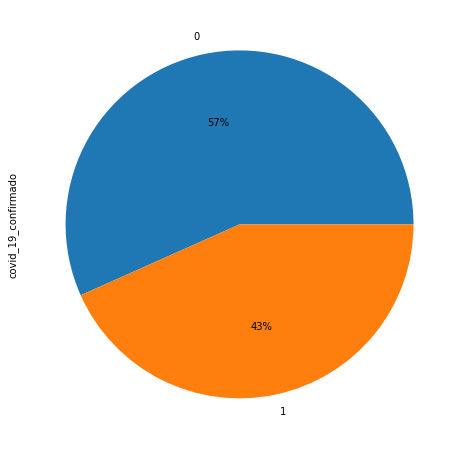

In [7]:
print(dataset.covid_19_confirmado.value_counts())
dataset.covid_19_confirmado.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8, 8))

### Referencias
- 0: caso descartado (Covid19 - Negativo)
- 1: caso confirmado (Covid19 - Positivo)

### Separar los conjuntos de train y test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Eliminamos la Feature fallecido porque añade información si lo que intentamos predecir es la variable covid_19_confirmado
feature_names = list(dataset.columns)
feature_names.remove('fallecido')
feature_names.remove('covid_19_confirmado')
feature_names

['edad',
 'sepi_apertura',
 'cuidado_intensivo',
 'asistencia_respiratoria_mecanica',
 'financiamiento_publico',
 'sexo_f',
 'sexo_m',
 'sexo_nr',
 'pcia_rec_eq_pcia_car',
 'residencia_provincia_buenos_aires',
 'residencia_provincia_caba',
 'residencia_provincia_catamarca',
 'residencia_provincia_chaco',
 'residencia_provincia_chubut',
 'residencia_provincia_Corrientes',
 'residencia_provincia_cordoba',
 'residencia_provincia_entre_rios',
 'residencia_provincia_formosa',
 'residencia_provincia_jujuy',
 'residencia_provincia_la_pampa',
 'residencia_provincia_la_rioja',
 'residencia_provincia_mendoza',
 'residencia_provincia_misiones',
 'residencia_provincia_neuquen',
 'residencia_provincia_rio_negro',
 'residencia_provincia_salta',
 'residencia_provincia_san_juan',
 'residencia_provincia_san_luis',
 'residencia_provincia_santa_cruz',
 'residencia_provincia_santa_fe',
 'residencia_provincia_santiago_del_estero',
 'residencia_provincia_tierra_del_fuego',
 'residencia_provincia_tucuman',
 

In [10]:
X = dataset[feature_names]
y = dataset['covid_19_confirmado']

In [11]:
X.shape, y.shape

((2249359, 34), (2249359,))

#### Train - Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2024423, 34), (224936, 34), (2024423,), (224936,))

#### Train - Validation

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=0)

In [15]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1821980, 34), (202443, 34), (1821980,), (202443,))

In [16]:
INPUT_COLUMNS = X_train.shape[1]
INPUT_COLUMNS

34

### MinMaxScaler

In [17]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()

X_train_minmax = mm_scaler.fit_transform(X_train)
X_val_minmax = mm_scaler.fit_transform(X_val)
X_test_minmax = mm_scaler.fit_transform(X_test)

In [18]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorf

## Modelado

In [19]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

In [20]:
# Hyperparameters
N_EPOCHS = 50
BATCH_SIZE = 128

In [21]:
# MLP Architecture
mlp_model = Sequential([   
    Dense(2048, input_shape=(INPUT_COLUMNS, )),
    Activation('relu'),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.50),
    
    
    Dense(256),
    Activation('relu'),   
    
    Dense(256),
    Activation('relu'),   
    
    Dense(128),
    Activation('relu'),
    
    Dense(128),
    Activation('relu'),
    
    Dense(2),
    Activation('softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              71680     
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0

In [23]:
mlp_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [24]:
path_checkpoint = "./models/best_model_class_covid_nn.h5"
#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint(path_checkpoint, monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [25]:
history_mlp = mlp_model.fit(
    X_train_minmax, 
    y_train_cat,
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(
        X_val_minmax,
        y_val_cat,
    ),
    callbacks = [early_stopping, model_checkpoint]
)

Train on 1821980 samples, validate on 202443 samples
Epoch 1/50
1821312/1821980 [============================>.] - ETA: 0s - loss: 0.6842 - acc: 0.5669
Epoch 00001: val_acc improved from -inf to 0.56578, saving model to ./models/best_model_class_covid_nn.h5
1821980/1821980 [==============================] - 143s 79us/sample - loss: 0.6843 - acc: 0.5669 - val_loss: 0.6846 - val_acc: 0.5658
Epoch 2/50
1821824/1821980 [============================>.] - ETA: 0s - loss: 0.6842 - acc: 0.5670
Epoch 00002: val_acc did not improve from 0.56578
1821980/1821980 [==============================] - 146s 80us/sample - loss: 0.6842 - acc: 0.5670 - val_loss: 0.6845 - val_acc: 0.5658
Epoch 3/50
1821824/1821980 [============================>.] - ETA: 0s - loss: 0.6842 - acc: 0.5670
Epoch 00003: val_acc did not improve from 0.56578
1821980/1821980 [==============================] - 160s 88us/sample - loss: 0.6842 - acc: 0.5670 - val_loss: 0.6845 - val_acc: 0.5658
Epoch 4/50
1821440/1821980 [==============

### Evaluación del Modelo

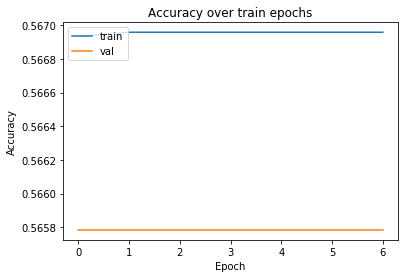

In [28]:
%matplotlib inline

plt.plot(history_mlp.history['acc'], label='train')
plt.plot(history_mlp.history['val_acc'], label='val')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [29]:
print('Max MLP Accuracy train: ', max(history_mlp.history['acc']))
print('Max MLP Accuracy validation: ', max(history_mlp.history['val_acc']))

Max MLP Accuracy train:  0.5669585
Max MLP Accuracy validation:  0.565784


#### Evaluación sobre el conjunto de Test

In [30]:
_, accuracy = mlp_model.evaluate(X_test_minmax, y_test_cat, verbose=1)

224936/224936 [==============================] - 9s 42us/sample - loss: 0.6844 - acc: 0.5662


In [31]:
print('Accuracy TEST: ' + str(accuracy))

Accuracy TEST: 0.56620103


### Predicciones sobre el conjunto de Test

In [32]:
import random as rnd

In [33]:
mlp_model = load_model(path_checkpoint)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
def pre_processing(x):
    x = x[feature_names].values
    x = np.reshape(x,(-1, 1))
    x = mm_scaler.fit_transform(x)
    return np.array([x.flatten()])

In [35]:
classes = {
    0: 'Covid19 - Negativo',
    1: 'Covid19 - Positivo'
}

In [36]:
for _ in range(10):
    index = rnd.randint(0, X_test.shape[0])
    print('Index: ', index)
    
    x_predict = X_test.iloc[index]
    y_real = y_test.iloc[index]
    x_predict = pre_processing(x_predict)
    prediction = mlp_model.predict(x_predict)
    y_predict = np.argmax(prediction)
    
    msg = classes[y_predict] + '(predicción = {0} | confianza: '.format(y_predict) + ' {0} %)'.format(prediction[y_predict][0])
    if (y_real == y_predict):
        print('Predicción exitosa: ' + msg)
    else:
        print('Predicción errónea: ' + msg)

Index:  170268
Predicción errónea: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  191875
Predicción errónea: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  31156
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  13393
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  131908
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  67923
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  212058
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  145002
Predicción errónea: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  147741
Predicción exitosa: Covid19 - Negativo(predicción = 0 | confianza:  0.5724658966064453 %)
Index:  167942
Predicción exitosa: Covid19 - Negativo(pred